In [78]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [69]:
# Clean up data by assigning columns, removing duplicates and unnecessary columns

earthquake_data = pd.read_csv('./Indian Earthquakes List Update_Magnitudes.csv', index_col = 0, skiprows = [0,1,2,3,4,5,6,7,8,9], low_memory = False)
cols = ["YEAR", "MONTH", "DATE", "UTC", "IST", "MW", "MW", "MB", "MB", "MS", "ML", "LAT (N)", "LON (E)", "DEPTH", "INTENSITY", "MMI", "MME", "LOCATION", "REFERENCE"]
earthquake_data.columns = cols
earthquake_data = earthquake_data.loc[:,~earthquake_data.columns.duplicated()]
earthquake_data.drop(['MB','MS','ML','IST','INTENSITY','MMI','MME', 'UTC', 'REFERENCE', 'LOCATION'], inplace = True, axis = 1)


In [70]:
#Reformatting all columns to appropriate datatypes

earthquake_data['YEAR'] = earthquake_data['YEAR'].astype('Int64').fillna(0)
earthquake_data['MONTH'] = pd.to_numeric(earthquake_data['MONTH'], errors='coerce').astype('Int64').fillna(0)
earthquake_data['DATE'] = earthquake_data['DATE'].astype('Int64').fillna(0)
earthquake_data['MW'] = pd.to_numeric(earthquake_data['MW'], errors='coerce').fillna(0)
earthquake_data['LAT (N)'] = pd.to_numeric(earthquake_data['LAT (N)'], errors='coerce').fillna(0)
earthquake_data['LON (E)'] = pd.to_numeric(earthquake_data['LON (E)'], errors='coerce').fillna(0)
earthquake_data['DEPTH'] = pd.to_numeric(earthquake_data['DEPTH'], errors='coerce').fillna(0)

THRESHOLD = 5
earthquake_data['EARTHQUAKE'] = np.where(earthquake_data['MW'] >= THRESHOLD, True, False).astype('bool')

In [71]:
# Setting the X and Y variables for the classifier

X = earthquake_data[earthquake_data.columns.difference(['EARTHQUAKE', 'MW'])]
Y = earthquake_data['EARTHQUAKE']

print(X.shape, Y.shape)

(52989, 6) (52989,)


0.8357237214568787
0.8745989809397999
0.8629930175504812
0.876863559162106
0.8741271938101529
0.8800717116437063
0.8789394225325533
0.8801660690696358
0.8795999245140592
0.8811096433289299
0.879316852236271
0.8812983581807888
0.8800717116437063
0.8825250047178713
0.8809209284770712
0.8812040007548594
0.8805434987733535
0.8814870730326476
0.8806378561992829
0.8808265710511417
0.8806378561992829
0.880449141347424
0.8808265710511417
0.8806378561992829
0.8808265710511417
0.8801660690696358
0.8806378561992829
0.8801660690696358
0.880449141347424
0.8805434987733535
0.880449141347424
0.8802604264955652
0.8809209284770712
0.8807322136252123
0.8805434987733535
0.8799773542177769
0.8802604264955652
0.8795999245140592
0.8795999245140592
0.879316852236271
0.8795999245140592
0.8795055670881299
0.8800717116437063
0.879316852236271
0.8798829967918476
0.8795055670881299
0.8798829967918476
0.8795999245140592
0.8795055670881299
0.8792224948103415


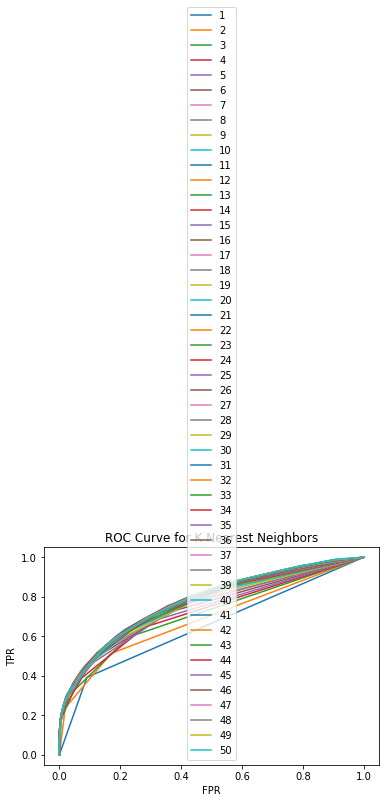

In [72]:
accuracy = []
neighbors = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1, 51):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    y_scores = classifier.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    plt.plot(fpr, tpr, label = str(i))

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test,y_pred)
    print(ac)
    neighbors.append(i)
    accuracy.append(ac * 100)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve for K Nearest Neighbors")
plt.legend()
plt.show()

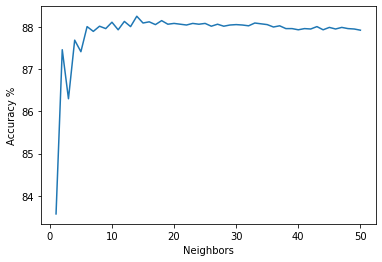

In [73]:
plt.xlabel("Neighbors")
plt.ylabel("Accuracy %")
plt.plot(neighbors, accuracy)
plt.show()


0.8558218531798453
0.8738441215323646
0.8846008680883185
0.8845065106623892
0.8885638799773542
0.8868654463106247
0.8862993017550481
0.8862993017550481
0.8880920928477071
0.8877146631439894
0.8850726552179656
0.8826193621438008
0.8802604264955652
0.8769579165880355
0.8736554066805058


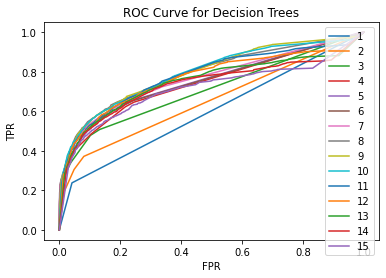

In [74]:
accuracy = []
depths = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1,16):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    y_scores = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    plt.plot(fpr, tpr, label = str(i))

    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test,y_pred)
    depths.append(i)
    accuracy.append(ac)
    print(ac)

    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve for Decision Trees")
plt.legend()
plt.show()

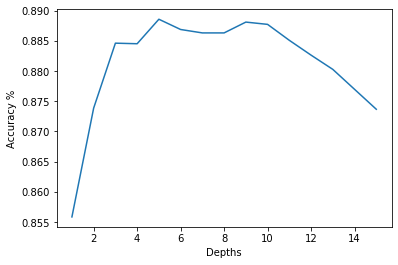

In [75]:
plt.xlabel("Depths")
plt.ylabel("Accuracy %")
plt.plot(depths, accuracy)
plt.show()


In [80]:
max_depth = accuracy.index(max(accuracy)) + 1

model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(X_train, y_train)

export_graphviz(model, out_file='tree.dot',  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])


![Decision Tree](./tree.png "Title")

0.879316852236271
0.8796942819399887
0.8799773542177769
0.8790337799584828
0.8789394225325533
0.878184563125118
0.8782789205510474
0.8780902056991885
0.878184563125118
0.878184563125118


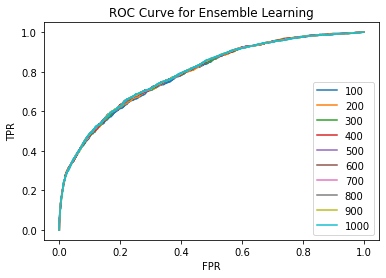

In [82]:
estimators = []
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for i in range(100, 1100, 100):
    adaboost = AdaBoostClassifier(n_estimators = i, base_estimator = None,learning_rate = 1, random_state = 1)
    adaboost.fit(X_train,y_train)
    y_pred = adaboost.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    ac = accuracy_score(y_test,y_pred)
    y_scores = adaboost.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    plt.plot(fpr, tpr, label = str(i))
    print(ac)
    estimators.append(i)
    accuracy.append(ac)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve for Ensemble Learning")
plt.legend()
plt.show()

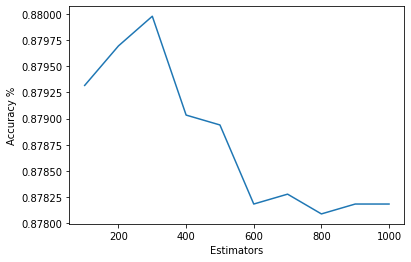

In [83]:
plt.xlabel("Estimators")
plt.ylabel("Accuracy %")
plt.plot(estimators, accuracy)
plt.show()

In [84]:
# neighbor = 14
# depth = 5
# estimator = 300

In [85]:
X = earthquake_data[earthquake_data.columns.difference(['EARTHQUAKE', 'MW'])]
Y = earthquake_data['EARTHQUAKE']

Y = np.array(Y).reshape(-1, 1)

bestfeatures = SelectKBest(score_func = f_classif, k = 6)
fit = bestfeatures.fit(X, np.ravel(Y))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

print(featureScores.nlargest(6, 'Score')) 


     Specs        Score
5     YEAR  1244.538184
3  LON (E)   463.297486
1    DEPTH    66.529405
2  LAT (N)    16.460592
4    MONTH    12.732038
0     DATE     2.389331


In [103]:
X = earthquake_data[['YEAR', 'LON (E)', 'DEPTH', 'LAT (N)']]
Y = earthquake_data['EARTHQUAKE']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_scores = model.predict_proba(X_test)


cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac -  0.8885638799773542)


0.004560608919922049
